## Downloading necessary Libraries

In [1]:
!pip install qiskit[visualization]==1.0.2
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-transpiler-service
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 15.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 15.0 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.53.7-py3-none-any.whl size=340285 sha256=d192a6bf47d2e0fca16bc3f8a018a6e1971b1cbbda74e6337890e36252791345
  Stored in directory: /root/.cache/pip/wheels/8e/54/ad/63e

## Set-up

Trouble Shooting

In [2]:
### CHECK QISKIT VERSION
import qiskit
qiskit.__version__

'1.0.2'

My API token

In [3]:
# Save your API token to track your progress

%set_env QXToken=c9508d6da4691fcd210a2f17be4828079678d7c70b08ee2eb648d498d34949ab6631ecafa39f9bcde4ca30a4e9204cf86017d0e716c6c66bdedfa287db718ccf

env: QXToken=c9508d6da4691fcd210a2f17be4828079678d7c70b08ee2eb648d498d34949ab6631ecafa39f9bcde4ca30a4e9204cf86017d0e716c6c66bdedfa287db718ccf


Improrting necessary libraries

In [4]:
### Imports

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qc_grader.challenges.iqc_2024 import grade_lab0_ex1

# Generate a two-qubit Bell state using Qiskit patterns
In this lab we follow along with the third episode of Coding with Qiskit 1.x. We've added a few coding challenges to make sure you're grasping the basics. This is the first lab in the IBM Quantum Challenge, so you can expect it to be easy. Solving future labs will require much more thought and research.

Our goal in this lab is to generate a two-qubit Bell state using the approach provided by Qiskit patterns.

A Qiskit pattern is a four step workflow for setting up, running, and getting results from a quantum computer. This is the workflow designed to help you use utility-scale quantum computers. It works as follows:

- Map circuits and operators
- Optimize the circuit
- Execute the circuit
- Post-process the results

## Step 1: Map circuits and operators
Mapping your problem to circuits and operators is fairly easy when you're only dealing with a handful of qubits, but can get more difficult as you scale up. To start, we will construct a Bell state. This is a classic (or should I say, "quantum") example that showcases entanglement between two qubits.

First we apply a Hadamard gate to qubit 0, placing it in a superposition. Then we apply a CNOT gate between qubits 0 and 1. The CNOT effectively entangles our qubits, meaning that when we measure the output of this circuit we should expect to see that both qubits share a measurement result.

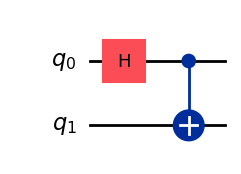

In [5]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a CNOT gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

### Exercise 1
Hey, look at us. Who would have thought — we made it to our first Challenge exercise!

In this first exercise, you should complete the list of operators. We have provided three for you already: the ZZ, ZI, and IX observables. We've also written comments in the code explaining what each observable is looking for.

Following the same approach, your task is to create the last three operators: IZ, XX, and XI

In [19]:
# The ZZ applies a Z operator on qubit 0, and a Z operator on qubit 1
ZZ = SparsePauliOp('ZZ')

# The ZI applies a Z operator on qubit 0, and an Identity operator on qubit 1
ZI = SparsePauliOp('ZI')

# The IX applies an Identity operator on qubit 0, and an X operator on qubit 1
IX = SparsePauliOp('IX')

### Write your code below here ###
### Follow the same naming convention we used above

IZ = SparsePauliOp('IZ')

XX = SparsePauliOp('XX')

XI = SparsePauliOp('XI')

## Don't change any code past this line, but remember to run the cell.

observables = [IZ, IX, ZI, XI, ZZ, XX]

In [20]:
# Submit your answer using following code

grade_lab0_ex1(observables)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Step 2: Optimize the circuit
A Qiskit pattern is the best framework for working with a quantum computer at utility scale — the point where quantum computers can perform reliable computations at a scale beyond brute force classical computing methods. These computations can use hundreds of qubits. However, in this intro section, we're only using two qubits. So, that means we do not need to do any work here to optimize the circuit.

To optimize the circuit, we can use the Qiskit transpiler. During transpilation, we can optimally layout our qubits to minimize the required number of gates, for example. You’ll learn more about this process in later labs. For now, you can move on to the next step of the pattern.

## Step 3: Execute the circuit
Time to run the circuit.

In this next cell, you might notice something new. We are going to run the circuit using Qiskit Runtime.

The next lab of the IBM Quantum Challenge covers Qiskit Runtime and the primitives in much greater detail. We won't talk about it too much in this lab other than to say that Qiskit Runtime gives us the easiest means of running our circuit.

Here we run our circuit using the Estimator, then save the results as the variable job. You may now proceed to the next and final step of Qiskit patterns, where we will visualize this information.

In [21]:
# Set up the Estimator
estimator = Estimator(backend=AerSimulator())

# Submit the circuit to Estimator
pub = (qc, observables)

job = estimator.run(pubs=[pub])

## Step 4: Post-process the results
The last step of Qiskit patterns is where we process, analyze, and visualize the results of our job.

There are many ways you can choose to do this. We showcase a number of different options throughout the IBM Quantum Challenge. It's always a great day to learn something new!

Here we are going to collect our data and plot it on a graph we construct.

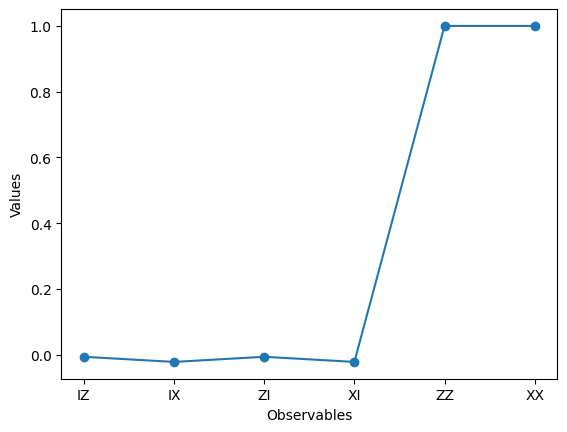

In [22]:
# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result()[0].data.evs

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()

You should see the operators which measure both qubits (ZZ and XX) have a value that's close to 1, and the other operators have a value that's close to 0. This shows that your circuit is entangled. Great work.

The plot displays as a line graph, but you can also visualize this as a bar graph

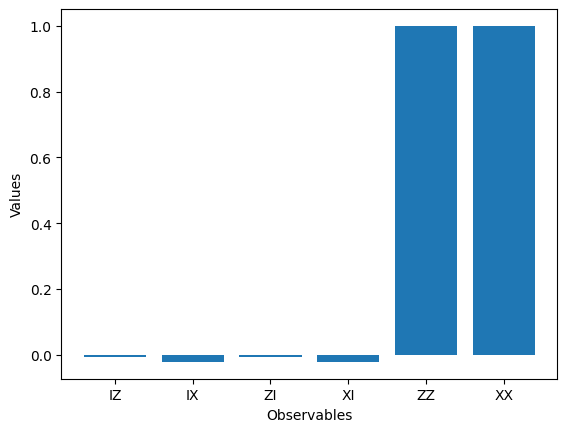

In [23]:
container = plt.bar(data, values, width=0.8)

plt.xlabel('Observables')
plt.ylabel('Values')

plt.show()